In [3]:
from continualworld.results_processing.utils import get_data_for_runs, METHODS_ORDER
from continualworld.results_processing.tables import calculate_metrics
from continualworld.results_processing.plots import visualize_sequence

In [4]:
# Replace with your own directories

cl_logs = 'examples/logs/cl'
mtl_logs = 'examples/logs/mtl'
baseline_logs = 'examples/logs/baseline'

In [5]:
cl_data = get_data_for_runs(cl_logs, kind="cl")
mtl_data = get_data_for_runs(mtl_logs, kind="mtl")
baseline_data = get_data_for_runs(baseline_logs, kind="single")

In [6]:
table = calculate_metrics(cl_data, mtl_data, baseline_data,
                          methods_order=METHODS_ORDER)
table

,performance,lb_performance,ub_performance,forgetting,lb_forgetting,ub_forgetting,total_normalized_ft,lb_total_normalized_ft,ub_total_normalized_ft
cl_method,,,,,,,,,
finetuning,0.020,0.02,0.02,-0.020,-0.02,-0.02,0.0,0.0,0.0
ewc,0.005,0.00,0.01,-0.005,-0.01,0.00,0.0,0.0,0.0
mtl_popart,0.000,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


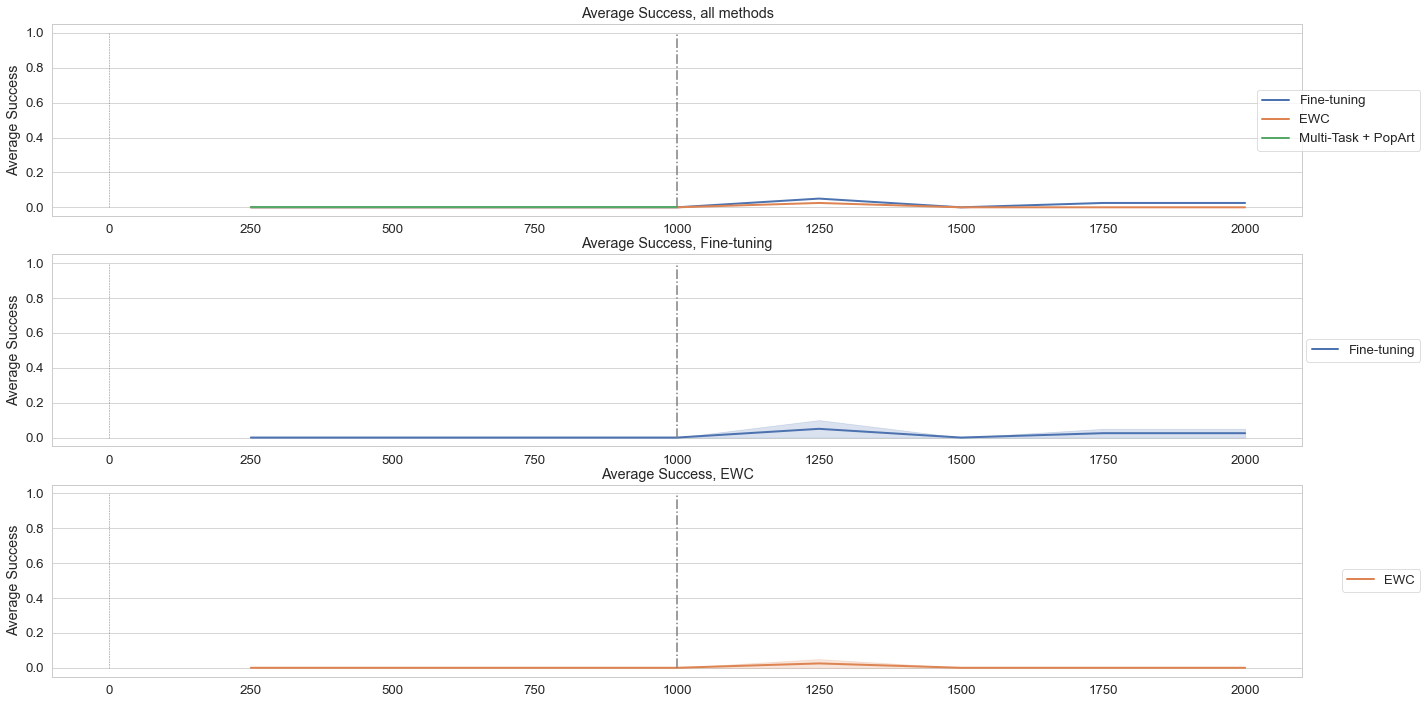

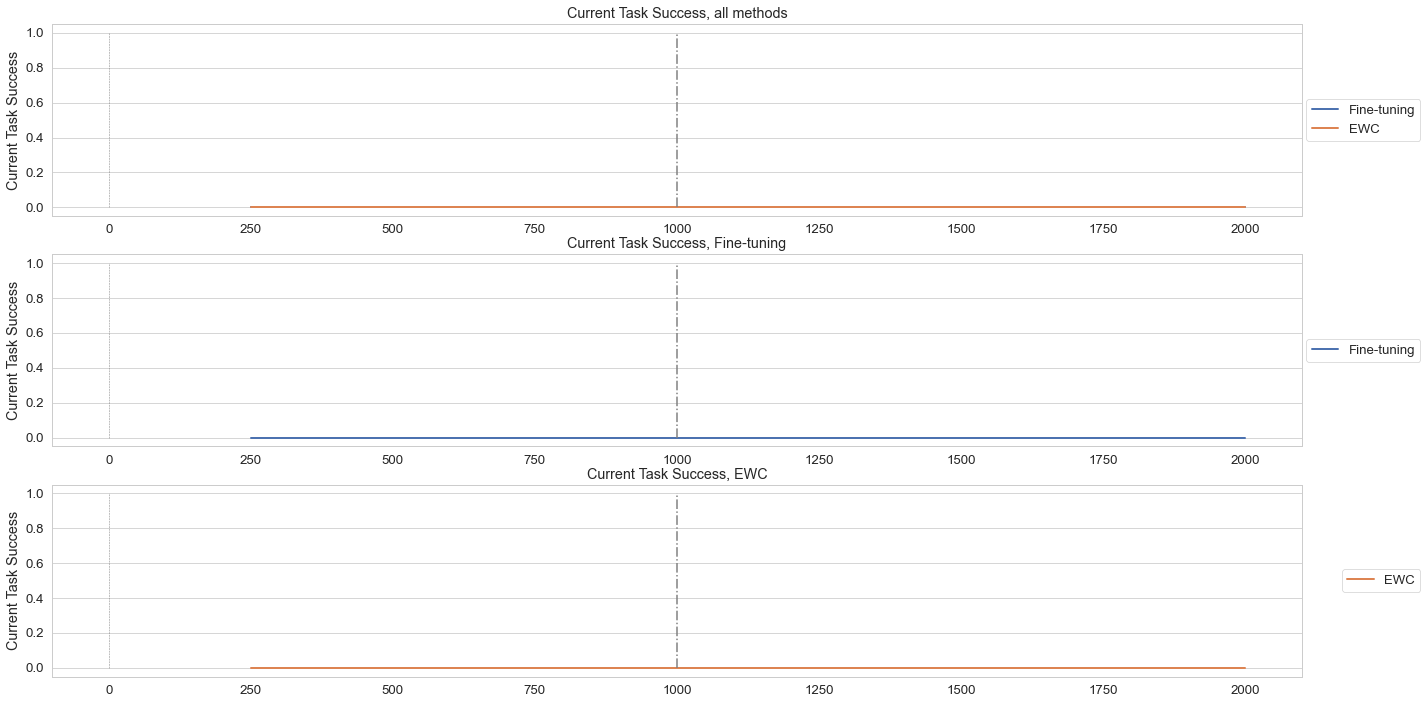

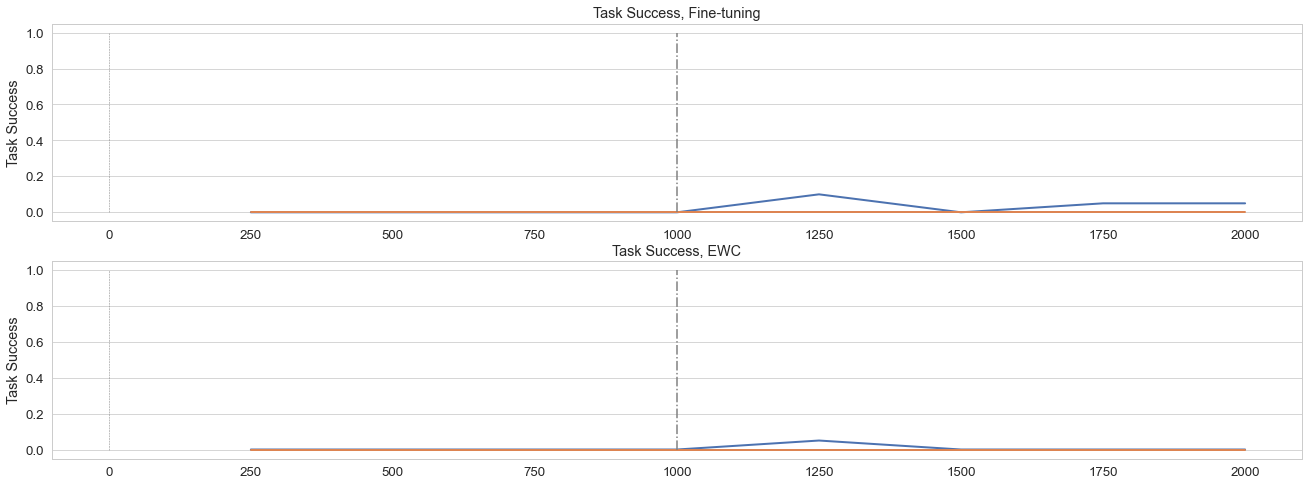

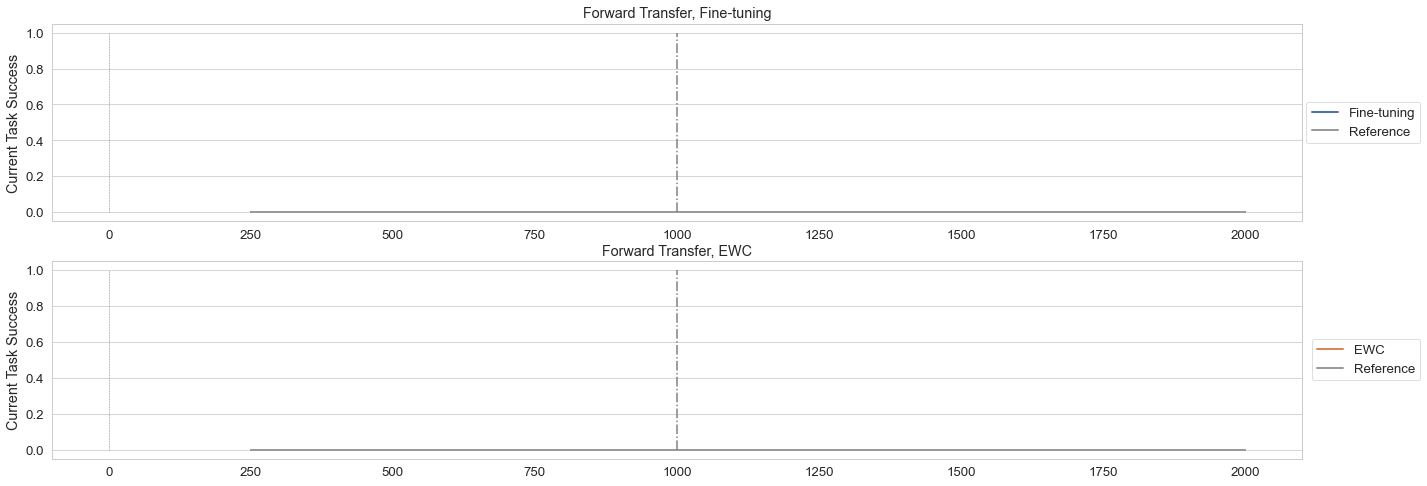

In [7]:
visualize_sequence(
    cl_data,
    mtl_data,
    baseline_data,
    group_by=['cl_method'],
    show_avg=True,
    show_current=True,
    show_individual=True,
    show_ft=True,
    order=('cl_method', METHODS_ORDER),
    smoothen=False
)